In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# there are no null values in the dataframe and that is a good thing

In [7]:
# Let's find out if there are any duplicates value or not

In [8]:
df.duplicated().sum()

1

In [9]:
# there is one duplicate value in the data
# so dropping the duplicate value from the dataframe

In [10]:
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.children.value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [12]:
# Now preparing the data for Algorithms
# here we will be applying Scaling, and something for categorical data as well

In [13]:
## for AGE and BMI columns we will be using Standard Scaler

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1], test_size=.2, random_state=42)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

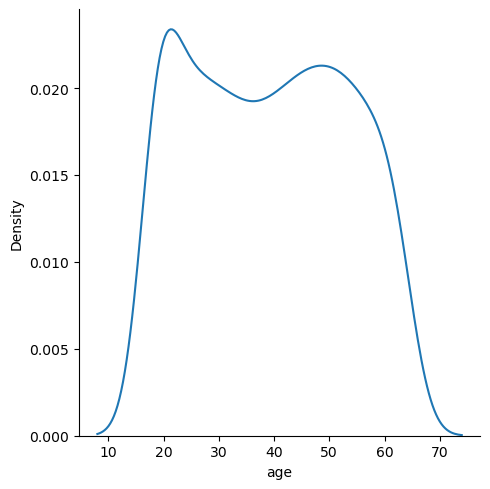

In [17]:
sns.displot(df.age,kind='kde');

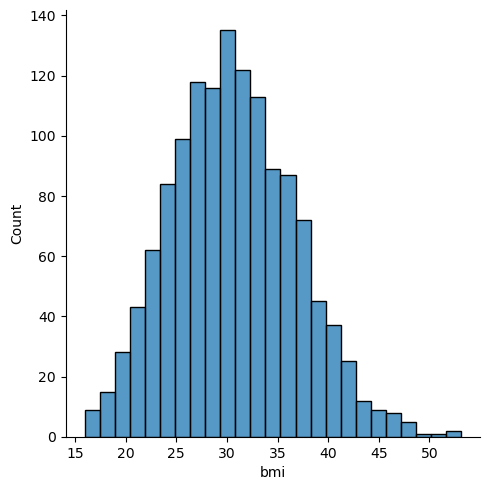

In [18]:
sns.displot(df.bmi);

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [21]:
# age, bmi = standardscaler()
# sex, smoker = one hot encoding
# region = label encoding

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [24]:
from sklearn.compose import ColumnTransformer

In [32]:
X = df.drop(columns='charges')
y = df['charges']

In [56]:
LE = LabelEncoder()

In [57]:
X['region_encoded'] = LE.fit_transform(X['region'])

In [59]:
X.head()

,age,sex,bmi,children,smoker,region,region_encoded
0,19,female,27.900,0,yes,southwest,3
1,18,male,33.770,1,no,southeast,2
2,28,male,33.000,3,no,southeast,2
3,33,male,22.705,0,no,northwest,1
4,32,male,28.880,0,no,northwest,1


In [60]:
X.drop(columns=['region'],inplace=True)
X.head()

,age,sex,bmi,children,smoker,region_encoded
0,19,female,27.900,0,yes,3
1,18,male,33.770,1,no,2
2,28,male,33.000,3,no,2
3,33,male,22.705,0,no,1
4,32,male,28.880,0,no,1


In [61]:
scaler = StandardScaler()

In [62]:
transformer = ColumnTransformer(transformers=[
            ('t1',StandardScaler(),['age','bmi']),
            ('t2',OneHotEncoder(sparse=False, drop='first'), ['sex','smoker'])
]
,remainder='passthrough')

In [64]:
X_trans = transformer.fit_transform(X)

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
X_trans

array([[-1.44041773, -0.45315959,  0.        ,  1.        ,  0.        ,
         3.        ],
       [-1.51164747,  0.50942165,  1.        ,  0.        ,  1.        ,
         2.        ],
       [-0.79935006,  0.3831546 ,  1.        ,  0.        ,  3.        ,
         2.        ],
       ...,
       [-1.51164747,  1.01448983,  0.        ,  0.        ,  0.        ,
         2.        ],
       [-1.29795825, -0.79752426,  0.        ,  0.        ,  0.        ,
         3.        ],
       [ 1.55123139, -0.26129928,  0.        ,  1.        ,  0.        ,
         1.        ]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=.2, random_state=42)

In [70]:
X_test.shape

(268, 6)

In [69]:
X.shape

(1337, 6)

In [71]:
## Now applying Linear algorithm on the dataset we have 

In [72]:
# first applying Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(X_test)

In [78]:
mean_squared_error(y_test, y_pred)

35493102.611650534

In [82]:
mean_absolute_error(y_test,y_pred)

4182.3531552883

In [79]:
r2_score(y_test, y_pred)

0.8068466322629111

In [80]:
lr.intercept_, lr.coef_

(8295.04481759772,
 array([ 3492.41859176,  1906.34828146,   -99.69539417, 23052.15275173,
          534.12087654,  -237.62514748]))

In [83]:
## Now using SGDRegressor and using Stochastic Gradient Descent

In [84]:
from sklearn.linear_model import SGDRegressor

In [85]:
sgd = SGDRegressor()

In [86]:
sgd.fit(X_train,y_train)

SGDRegressor()

In [88]:
y_pred2 = sgd.predict(X_test)

In [90]:
mean_absolute_error(y_test,y_pred2)

4189.62370408612

In [91]:
mean_squared_error(y_test, y_pred2)

35678711.41782271

In [92]:
r2_score(y_test,y_pred2)

0.8058365496452802

In [93]:
sgd.intercept_, sgd.coef_

(array([8299.7131002]),
 array([ 3505.08159255,  1885.38488183,   -84.76400948, 22922.28538844,
          524.53939606,  -230.29340715]))

In [94]:
# Now doing it with Mini Batch Gradient Descent

In [95]:
sgd2 = SGDRegressor(learning_rate='constant', eta0=0.1)

In [99]:
import random

In [117]:
batch_size = 35

for i in range(100):
    
    idx = np.random.choice((X_train.shape[0]), batch_size)
    sgd2.partial_fit(X_train[idx],y_train[idx])

KeyError: '[51, 860, 905, 286, 618, 247] not in index'

In [107]:
type(X_train)

numpy.ndarray

In [111]:
list(X_train).index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [116]:
X_train[667]

array([0.91016372, 0.08798488, 0.        , 0.        , 0.        ,
       3.        ])

In [121]:
y_train.shape[0]

1069

In [127]:
# Now doing it with Ridge Regression

In [129]:
from sklearn.linear_model import Ridge

In [140]:
rid = Ridge(alpha=0.5)

In [141]:
X_train.shape

(1069, 6)

In [142]:
rid.fit(X_train,y_train)

Ridge(alpha=0.5)

In [143]:
y_pred = rid.predict(X_test)

In [144]:
r2_score(y_test, y_pred)

0.8063588577738378

In [152]:
# doing it with loop and taking multiple values of alpha
l = np.logspace(-4, 4, 50) 

for i in l:
    rid2 = Ridge(alpha=i)
    
    rid2.fit(X_train,y_train)
    print(i, 'r2_score is:', r2_score(y_test,rid2.predict(X_test)))

0.0001 r2_score is: 0.8068465353253483
0.00014563484775012445 r2_score is: 0.8068464910879567
0.00021209508879201905 r2_score is: 0.8068464266628059
0.00030888435964774815 r2_score is: 0.8068463328371392
0.0004498432668969444 r2_score is: 0.8068461961938556
0.0006551285568595509 r2_score is: 0.8068459971927333
0.0009540954763499944 r2_score is: 0.8068457073758768
0.0013894954943731374 r2_score is: 0.806845285297562
0.0020235896477251557 r2_score is: 0.8068446705960162
0.0029470517025518097 r2_score is: 0.8068437753584665
0.004291934260128779 r2_score is: 0.8068424715426832
0.0062505519252739694 r2_score is: 0.8068405726520871
0.009102981779915217 r2_score is: 0.8068378070350102
0.013257113655901081 r2_score is: 0.8068337789709017
0.019306977288832496 r2_score is: 0.8068279119384651
0.02811768697974228 r2_score is: 0.8068193658675276
0.040949150623804234 r2_score is: 0.8068069163603372
0.05963623316594643 r2_score is: 0.8067887782269152
0.08685113737513521 r2_score is: 0.806762347287446

In [154]:
# Now doing it in a better way using RidgeCV
# RidgeCV has a built-in cross validation

In [155]:
from sklearn.linear_model import RidgeCV

In [157]:
rid_cv = RidgeCV(alphas=l, store_cv_values=True)

In [158]:
rid_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
        store_cv_values=True)

In [160]:
best_alpha = rid_cv.alpha_
best_alpha

0.18420699693267145

In [161]:
rid_cv.score(X_test, y_test)

0.8066676457722926

In [ ]:
# Now doing the same for Lasso Regression

In [162]:
from sklearn.linear_model import Lasso, LassoCV

In [168]:
lasso_cv = LassoCV(alphas=l)

In [ ]:
for i in l:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    print(i, "r2_score is:", r2_score(y_test, lasso.predict(X_test)))

In [165]:
lasso = Lasso(alpha=0.1)

In [182]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [167]:
X_train

array([[-1.15549877, -1.00906256,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.29795825, -0.80654334,  1.        ,  0.        ,  2.        ,
         0.        ],
       [ 0.91016372,  1.12517847,  0.        ,  0.        ,  2.        ,
         1.        ],
       ...,
       [-1.36918799, -1.42066033,  1.        ,  0.        ,  1.        ,
         3.        ],
       [-0.08705265, -0.43676128,  0.        ,  0.        ,  3.        ,
         3.        ],
       [-0.30074188,  0.85214648,  0.        ,  0.        ,  2.        ,
         2.        ]])

In [126]:
# Now doing with Polynomaial Regression

In [169]:
from sklearn.preprocessing import PolynomialFeatures

In [170]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [171]:
X_train1 = poly.fit_transform(X_train)
X_test1 = poly.transform(X_test)

In [172]:
lr4 = LinearRegression()
lr4.fit(X_train1, y_train)

LinearRegression()

In [175]:
r2_score(y_test, lr4.predict(X_test1))

0.8866092062012377

In [176]:
# In polynomial regression R2_score has risen to 0.88 and earlier it was 0.80

In [177]:
# doing it with multiple degress and finding out which is the best 

In [181]:
s = [i for i in range(0,15)]

for i in s:
    poly2 = PolynomialFeatures(degree=i, include_bias=True)
    
    X_train_trans2 = poly2.fit_transform(X_train)
    X_test_trans2 = poly2.transform(X_test)
    
    lr5 = LinearRegression()
    lr5.fit(X_train_trans2, y_train)
    
    print(i, 'r2_score is:', r2_score(y_test, lr5.predict(X_test_trans2)))

0 r2_score is: -0.008391982350864469
1 r2_score is: 0.8068466322629109
2 r2_score is: 0.8866092062012377
3 r2_score is: 0.8772539937543344
4 r2_score is: 0.8504476729839126
5 r2_score is: 0.5210783618872205
6 r2_score is: -42.66824008275516
7 r2_score is: -1062.8002210211832
8 r2_score is: -262721.56772565487
9 r2_score is: -1264625516.0443199
10 r2_score is: -6668796668.975592
11 r2_score is: -14353079544.225409
12 r2_score is: -54972644790.59153
13 r2_score is: -648302417311.7
14 r2_score is: -9581629200439.6
